# Titanic Data Science Solutions

In [108]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Acquire data

In [109]:
train_df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
combine = [train_df, test_df]

## Analyze by describing data

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
print(train_df.isna().sum())
print('_'*40)
print(test_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Analyze by pivoting features

In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data

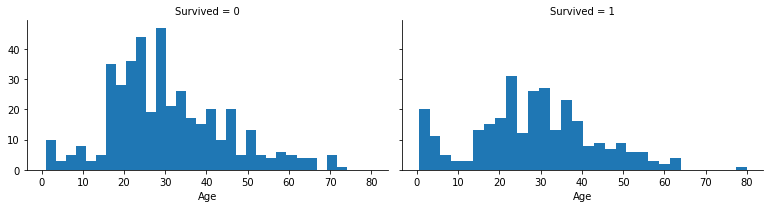

In [15]:
g = sns.FacetGrid(train_df, col='Survived', aspect=1.8)
g.map(plt.hist, 'Age', bins=30)

### Correlating numerical and ordinal features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


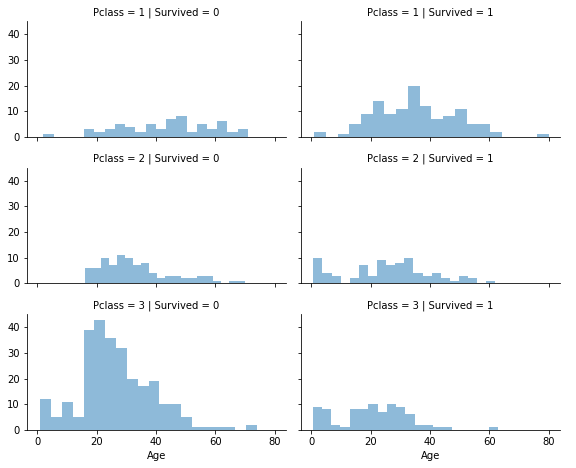

In [16]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.8)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


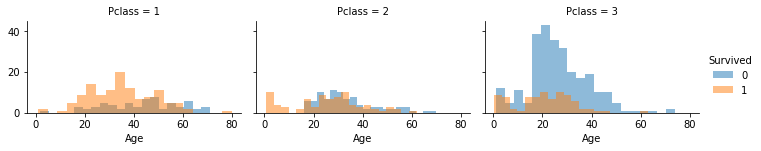

In [17]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived', size=2.2, aspect=1.5)
grid.map(plt.hist, 'Age',alpha=0.5, bins=20)
grid.add_legend();

### Correlating categorical features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


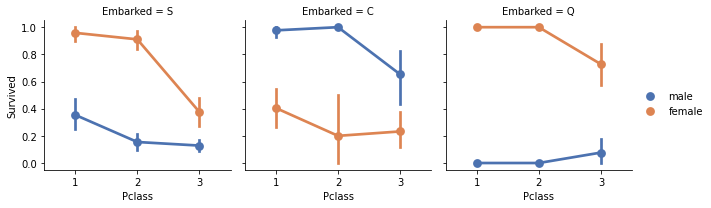

In [18]:
grid = sns.FacetGrid(train_df, col='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Correlating categorical and numerical features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


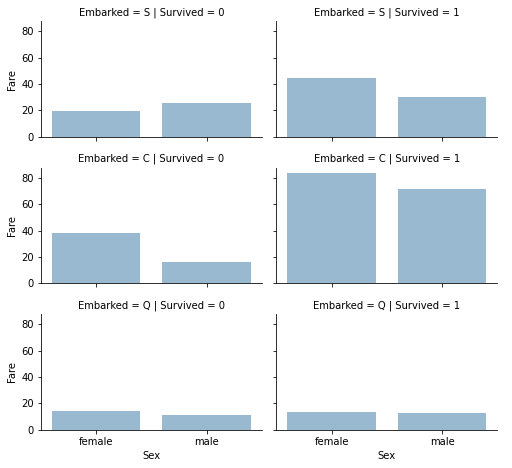

In [19]:
#grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'b', 1: 'r'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


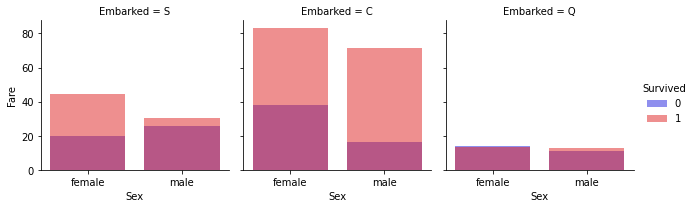

In [21]:
grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'b', 1: 'r'})
#grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Wrangle data

### Correcting by dropping features

In [110]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [23]:
train_df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

### Creating new feature extracting from existing

In [111]:
# Create New feature 'Title'
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [112]:
# Checking each title
for dataset in combine:
  print(dataset.loc[(dataset['Title']=='Jonkheer'), ['Name','Title', 'Age', 'Sex']])

                                Name     Title   Age   Sex
822  Reuchlin, Jonkheer. John George  Jonkheer  38.0  male
Empty DataFrame
Columns: [Name, Title, Age, Sex]
Index: []


In [113]:
# Replacing many titles with a more common name
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'],'Miss')
  dataset['Title'] = dataset['Title'].replace(['Mme','Lady'], 'Mrs')
  dataset['Title'] = dataset['Title'].replace(['Sir', 'Rev', 'Major', 'Don', 'Col', 'Capt', 'Jonkheer'], 'Mr')
  dataset['Title'] = dataset['Title'].replace(['Dona', 'Countess'],'Mrs')

In [114]:
# checking title 'Dr'
train_df.loc[(train_df['Title']=='Dr'), ['Name','Title', 'Age', 'Sex']]

,Name,Title,Age,Sex
245,"Minahan, Dr. William Edward",Dr,44.0,male
317,"Moraweck, Dr. Ernest",Dr,54.0,male
398,"Pain, Dr. Alfred",Dr,23.0,male
632,"Stahelin-Maeglin, Dr. Max",Dr,32.0,male
660,"Frauenthal, Dr. Henry William",Dr,50.0,male
766,"Brewe, Dr. Arthur Jackson",Dr,NaN,male
796,"Leader, Dr. Alice (Farnham)",Dr,49.0,female


In [115]:
# Replace 'Dr' to 'Mr' or 'Mrs
for dataset in combine:
    dataset.loc[(dataset['Title']=='Dr')& (dataset['Sex']=='male'), 'Title'] = 'Mr'
    dataset.loc[(dataset['Title']=='Dr')& (dataset['Sex']=='female'), 'Title'] = 'Mrs'

In [116]:
for dataset in combine:
    print(dataset.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master']
['Mr' 'Mrs' 'Miss' 'Master']


In [117]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.160149
3,Mrs,0.798450


### Converting a categorical feature

In [118]:
# convert the categorical titles to ordinal.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [119]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Completing a numerical continuous feature

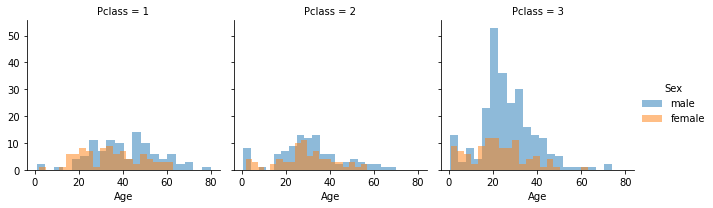

In [47]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Sex')
#grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


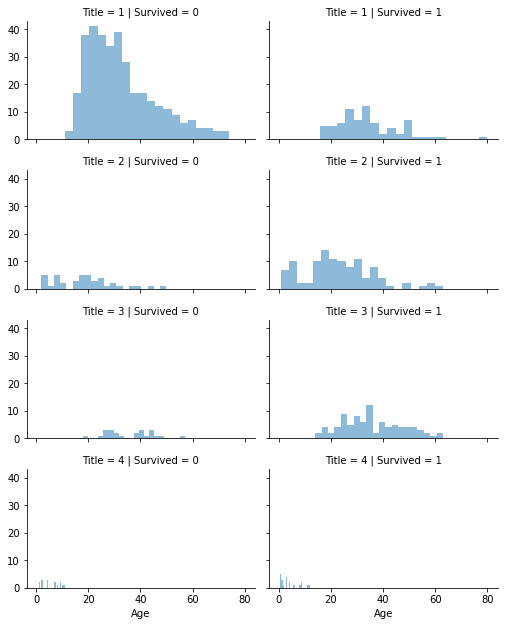

In [48]:
grid = sns.FacetGrid(train_df, row='Title', col='Survived', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

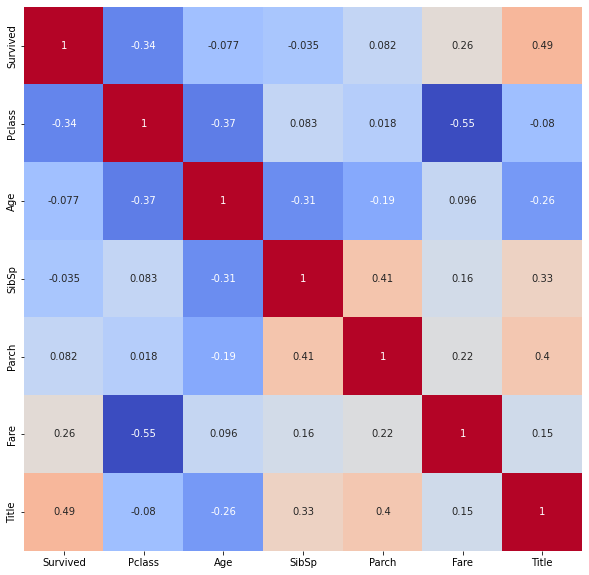

In [120]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True, cbar=False, cmap='coolwarm')
plt.show()

In [106]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0.0
1,1,1,female,38.0,1,0,71.2833,C,0.0
2,1,3,female,26.0,0,0,7.9250,S,0.0
3,1,1,female,35.0,1,0,53.1000,S,0.0
4,0,3,male,35.0,0,0,8.0500,S,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0.0
887,1,1,female,19.0,0,0,30.0000,S,0.0
888,0,3,female,NaN,1,2,23.4500,S,0.0
889,1,1,male,26.0,0,0,30.0000,C,0.0


In [125]:
for dataset in combine:
  print(dataset.loc[(dataset['Title']==4)&(dataset['Pclass']==1), 'Age'].median())
  print(dataset.loc[(dataset['Title']==4)&(dataset['Pclass']==2), 'Age'].median())
  print(dataset.loc[(dataset['Title']==4)&(dataset['Pclass']==3), 'Age'].median())

4.0
1.0
4.0
9.5
5.0
7.0


In [126]:
for dataset in combine:
  dataset.loc[(dataset['Title']==1) & (dataset['Pclass']==1) & dataset.Age.isna(), 'Age'] = dataset.loc[(dataset['Title']==1)&(dataset['Pclass']==1),'Age'].median()
  dataset.loc[(dataset['Title']==1) & (dataset['Pclass']==2) &dataset.Age.isna(), 'Age'] = dataset.loc[(dataset['Title']==1)&(dataset['Pclass']==2), 'Age'].median()
  dataset.loc[(dataset['Title']==1) & (dataset['Pclass']==3) &dataset.Age.isna(), 'Age'] = dataset.loc[(dataset['Title']==1)&(dataset['Pclass']==3), 'Age'].median()
  dataset.loc[(dataset['Title']==2) & (dataset['Pclass']==1) &dataset.Age.isna(), 'Age'] = dataset.loc[(dataset['Title']==2)&(dataset['Pclass']==1), 'Age'].median()
  dataset.loc[(dataset['Title']==2) & (dataset['Pclass']==2) &dataset.Age.isna(), 'Age'] = dataset.loc[(dataset['Title']==2)&(dataset['Pclass']==2), 'Age'].median()
  dataset.loc[(dataset['Title']==2) & (dataset['Pclass']==3) &dataset.Age.isna(), 'Age'] = dataset.loc[(dataset['Title']==2)&(dataset['Pclass']==3), 'Age'].median()
  dataset.loc[(dataset['Title']==3) & (dataset['Pclass']==1) &dataset.Age.isna(), 'Age'] = dataset.loc[(dataset['Title']==3)&(dataset['Pclass']==1), 'Age'].median()
  dataset.loc[(dataset['Title']==3) & (dataset['Pclass']==2) &dataset.Age.isna(), 'Age'] = dataset.loc[(dataset['Title']==3)&(dataset['Pclass']==2), 'Age'].median()
  dataset.loc[(dataset['Title']==3) & (dataset['Pclass']==3) &dataset.Age.isna(), 'Age'] = dataset.loc[(dataset['Title']==3)&(dataset['Pclass']==3), 'Age'].median()
  dataset.loc[(dataset['Title']==4) &dataset.Age.isna(), 'Age'] = dataset.loc[(dataset['Title']==4), 'Age'].median()

In [127]:
for dataset in combine:
  print(dataset['Age'].isna().sum())

0
0


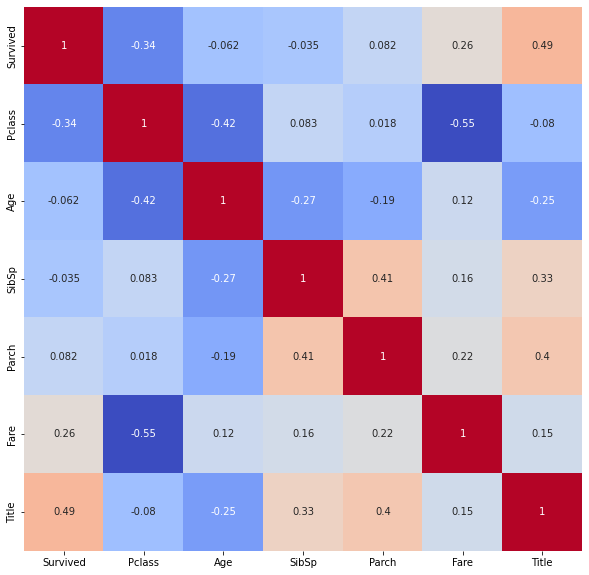

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True, cbar=False, cmap='coolwarm')
plt.show()

In [129]:
# Create AgeBand
train_df['AgeBand'] = pd.cut(train_df['Age'], 6)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 13.683]",0.586667
1,"(13.683, 26.947]",0.310992
2,"(26.947, 40.21]",0.431818
3,"(40.21, 53.473]",0.403101
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


In [130]:
# replace Age with ordinals based on these bands
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64) & (dataset['Age'] <= 80), 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,male,1.0,1,0,7.2500,S,1,"(13.683, 26.947]"
1,1,1,female,2.0,1,0,71.2833,C,3,"(26.947, 40.21]"
2,1,3,female,1.0,0,0,7.9250,S,2,"(13.683, 26.947]"
3,1,1,female,2.0,1,0,53.1000,S,3,"(26.947, 40.21]"
4,0,3,male,2.0,0,0,8.0500,S,1,"(26.947, 40.21]"


In [131]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,1.0,1,0,7.2500,S,1
1,1,1,female,2.0,1,0,71.2833,C,3
2,1,3,female,1.0,0,0,7.9250,S,2
3,1,1,female,2.0,1,0,53.1000,S,3
4,0,3,male,2.0,0,0,8.0500,S,1


### Create new feature combining existing features

In [132]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [133]:
# create another feature called IsAlone.
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [134]:
# drop Parch, SibSp, and FamilySize features in favor of IsAlone.
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,male,1.0,7.2500,S,1,0
1,1,1,female,2.0,71.2833,C,3,0
2,1,3,female,1.0,7.9250,S,2,1
3,1,1,female,2.0,53.1000,S,3,0
4,0,3,male,2.0,8.0500,S,1,1


In [135]:
# Create an artificial feature combining Pclass and Age.
for dataset in combine:
    dataset['Age*Title'] = dataset.Age * dataset.Title

train_df.loc[:, ['Age*Title', 'Age', 'Title']].head(10)

,Age*Title,Age,Title
0,1.0,1.0,1
1,6.0,2.0,3
2,2.0,1.0,2
3,6.0,2.0,3
4,2.0,2.0,1
5,1.0,1.0,1
6,3.0,3.0,1
7,0.0,0.0,4
8,3.0,1.0,3
9,0.0,0.0,3


### Completing a categorical feature

In [136]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [137]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

In [138]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Title
0,0,3,male,1.0,7.2500,0,1,0,1.0
1,1,1,female,2.0,71.2833,1,3,0,6.0
2,1,3,female,1.0,7.9250,0,2,1,2.0
3,1,1,female,2.0,53.1000,0,3,0,6.0
4,0,3,male,2.0,8.0500,0,1,1,2.0


In [139]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Title
0,0,3,0,1.0,7.2500,0,1,0,1.0
1,1,1,1,2.0,71.2833,1,3,0,6.0
2,1,3,1,1.0,7.9250,0,2,1,2.0
3,1,1,1,2.0,53.1000,0,3,0,6.0
4,0,3,0,2.0,8.0500,0,1,1,2.0


### Quick completing and converting a numeric feature

In [140]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Title
0,892,3,0,2.0,7.8292,2,1,1,2.0
1,893,3,1,2.0,7.0000,0,3,0,6.0
2,894,2,0,3.0,9.6875,2,1,1,3.0
3,895,3,0,1.0,8.6625,0,1,1,1.0
4,896,3,1,1.0,12.2875,0,3,0,3.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


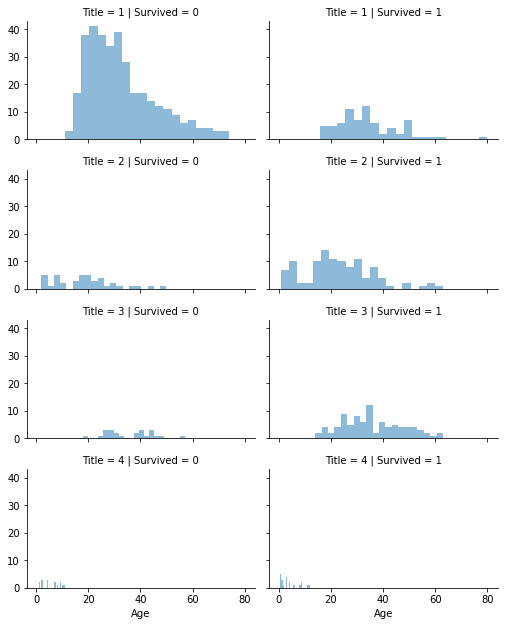

In [64]:
grid = sns.FacetGrid(train_df, row='Title', col='Survived', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [141]:
# Create FareBand
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [142]:
# Convert the Fare feature to ordinal values based on the FareBand.
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 8, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.5) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31), 'Fare']   = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Title
0,0,3,0,1.0,0,0,1,0,1.0
1,1,1,1,2.0,3,1,3,0,6.0
2,1,3,1,1.0,0,0,2,1,2.0
3,1,1,1,2.0,3,0,3,0,6.0
4,0,3,0,2.0,1,0,1,1,2.0
5,0,3,0,1.0,1,2,1,1,1.0
6,0,1,0,3.0,3,0,1,1,3.0
7,0,3,0,0.0,2,0,4,0,0.0
8,1,3,1,1.0,1,0,3,0,3.0
9,1,2,1,0.0,2,1,3,0,0.0


In [67]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Title
0,892,3,0,34.5,0,2,1,1,34.5
1,893,3,1,47.0,0,0,3,0,141.0
2,894,2,0,62.0,1,2,1,1,62.0
3,895,3,0,27.0,1,0,1,1,27.0
4,896,3,1,22.0,1,0,3,0,66.0
5,897,3,0,14.0,1,0,1,1,14.0
6,898,3,1,30.0,0,2,2,1,60.0
7,899,2,0,26.0,2,0,1,0,26.0
8,900,3,1,18.0,0,1,3,1,54.0
9,901,3,0,21.0,2,0,1,0,21.0


In [68]:
for dataset in combine:
    dataset.drop('Age', axis=1, inplace=True)

In [69]:
for dataset in combine:
    dataset.drop('Embarked', axis=1, inplace=True)

## Model, predict and solve

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- HistGradientBoosting
- Bagging
- Stacking

In [143]:
X= train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [204]:
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [205]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [146]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((712, 8), (179, 8), (712,), (179,), (418, 8))

In [147]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_val)
acc_log = round(logreg.score(X_val, y_val) * 100, 2)
acc_log

78.77

In [148]:
logreg.coef_

array([[-1.09278477,  0.77399609, -0.65997794, -0.05741396,  0.25612598,
         0.67963987,  0.2149405 ,  0.42211183]])

In [149]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,0.773996
5,Title,0.679640
7,Age*Title,0.422112
4,Embarked,0.256126
6,IsAlone,0.214941
3,Fare,-0.057414
2,Age,-0.659978
0,Pclass,-1.092785


In [150]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_val)
acc_svc = round(svc.score(X_val, y_val) * 100, 2)
acc_svc

79.89

In [151]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)
acc_knn = round(knn.score(X_val, y_val) * 100, 2)
acc_knn

83.24

In [152]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_pred = gaussian.predict(X_val)
acc_gaussian = round(gaussian.score(X_val, y_val) * 100, 2)
acc_gaussian

73.18

In [153]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
perceptron_pred = perceptron.predict(X_val)
acc_perceptron = round(perceptron.score(X_val, y_val) * 100, 2)
acc_perceptron

74.3

In [154]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
linear_svc_pred = linear_svc.predict(X_val)
acc_linear_svc = round(linear_svc.score(X_val, y_val) * 100, 2)
acc_linear_svc

79.33

In [155]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_val)
acc_sgd = round(sgd.score(X_val, y_val) * 100, 2)
acc_sgd

72.07

In [156]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_val)
acc_decision_tree = round(decision_tree.score(X_val, y_val) * 100, 2)
acc_decision_tree

78.21

In [157]:
# Random Forest
random_forest = RandomForestClassifier(random_state=0, n_estimators= 500, criterion = 'gini',max_features = 'auto',max_depth = 8)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_val)
acc_random_forest = round(random_forest.score(X_val, y_val) * 100, 2)
acc_random_forest

82.12

In [158]:
# HistGradientBoosting
his_gbm = HistGradientBoostingClassifier(max_depth=5)
his_gbm.fit(X_train, y_train)
his_gbm_pred = random_forest.predict(X_val)
acc_his_gbm = round(random_forest.score(X_val, y_val) * 100, 2)
acc_his_gbm

82.12

In [159]:
# bagging
bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                           bootstrap=False,max_samples=1.0,bootstrap_features=True,max_features=0.7,n_jobs=-1)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_val)
acc_bag = round(random_forest.score(X_val, y_val) * 100, 2)
acc_bag

82.12

### Stacking

In [174]:
logreg.fit(X_val,y_val)
svc.fit(X_val,y_val)
knn.fit(X_val,y_val)
gaussian.fit(X_val,y_val)
perceptron.fit(X_val,y_val)
linear_svc.fit(X_val,y_val)
sgd.fit(X_val,y_val)
decision_tree.fit(X_val,y_val)
random_forest.fit(X_val,y_val)
his_gbm.fit(X_val,y_val)
bag.fit(X_val,y_val)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  bootstrap_features=True, max_features=0.7, n_estimators=500,
                  n_jobs=-1)

In [175]:
logreg_pred = logreg.predict(X_val)
svc_pred = svc.predict(X_val)
knn_pred = knn.predict(X_val)
gaussian_pred = gaussian.predict(X_val)
perceptron_pred = perceptron.predict(X_val)
linear_svc_pred = linear_svc.predict(X_val)
sgd_pred = sgd.predict(X_val)
decision_tree_pred = decision_tree.predict(X_val)
random_forest_pred = random_forest.predict(X_val)
his_gbm_pred = his_gbm.predict(X_val)
bag_pred = bag.predict(X_val)

In [176]:
pred1 = np.array([random_forest_pred, decision_tree_pred , svc_pred, knn_pred, perceptron_pred, 
                  linear_svc_pred, logreg_pred, sgd_pred, svc_pred, gaussian_pred, his_gbm_pred, bag_pred]).T
pred1

array([[1, 1, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [177]:
logreg.fit(X,y)
svc.fit(X,y)
knn.fit(X,y)
gaussian.fit(X,y)
perceptron.fit(X,y)
linear_svc.fit(X,y)
sgd.fit(X,y)
decision_tree.fit(X,y)
random_forest.fit(X,y)
his_gbm.fit(X,y)
bag.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  bootstrap_features=True, max_features=0.7, n_estimators=500,
                  n_jobs=-1)

In [178]:
logreg_pred = logreg.predict(X_test)
svc_pred = svc.predict(X_test)
knn_pred = knn.predict(X_test)
gaussian_pred = gaussian.predict(X_test)
perceptron_pred = perceptron.predict(X_test)
linear_svc_pred = linear_svc.predict(X_test)
sgd_pred = sgd.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
his_gbm_pred = his_gbm.predict(X_test)
bag_pred = bag.predict(X_test)

In [182]:
pred2 = np.array([random_forest_pred, decision_tree_pred , svc_pred, knn_pred, perceptron_pred, 
                  linear_svc_pred, logreg_pred, sgd_pred, svc_pred, gaussian_pred, his_gbm_pred, bag_pred]).T
dc_final = RandomForestClassifier()
dc_final.fit(pred1, y_val)
acc_stcking = round(dc_final.score(pred1, y_val) * 100, 2)
acc_stcking

89.94

### Model evaluation

In [183]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'HistGradientBoosting', 'Bagging','Stacking'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_his_gbm, acc_bag, acc_stcking]})
models.sort_values(by='Score', ascending=False)

,Model,Score
11,Stacking,89.94
1,KNN,83.24
3,Random Forest,82.12
9,HistGradientBoosting,82.12
10,Bagging,82.12
0,Support Vector Machines,79.89
7,Linear SVC,79.33
2,Logistic Regression,78.77
8,Decision Tree,78.21
5,Perceptron,74.30


In [186]:
final = dc_final.predict(pred2)
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": final
    })
submission.to_csv('submission.csv', index=False)

### Hyper parameter tunning

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Tuning Multiple Hyperparameters
# read in hyperopt values
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
# redefine the function usng a wider range of hyperparameters
def objective(search_space):
    model = DecisionTreeClassifier(**search_space)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy,'status': STATUS_OK}
# new search space
search_space={'max_depth':hp.choice('max_depth', range(3, 17)),
             'min_samples_split':hp.uniform('min_samples_split', 0, 1),
             'min_samples_leaf':hp.choice('min_samples_leaf', range(1, 30)),
             'criterion':hp.choice('criterion', ['gini','entropy']),
             'max_features':hp.choice('max_features', [None,'sqrt','log2'])}
# set the hyperparam tuning algorithm
algorithm=tpe.suggest
# implement Hyperopt
best_params = fmin(
    fn=objective,
    space=search_space,
    algo=algorithm,
    max_evals=100)
space_eval(search_space, best_params)
new_dtclf = DecisionTreeClassifier(**space_eval(search_space, best_params))
new_dtclf.fit(X_train, y_train)

100%|██████████| 100/100 [00:01<00:00, 88.81it/s, best loss: -0.8044692737430168]


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=23,
                       min_samples_split=0.1693410806313712)

In [201]:
new_dtclf.fit(X_train, y_train)
new_dtclf.score(X_val, y_val)

0.8044692737430168

In [202]:
new_dtclf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=23,
                       min_samples_split=0.1693410806313712)

In [206]:
predict = new_dtclf.predict(X_test)
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": predict
    })
submission.to_csv('submission.csv', index=False)